In [15]:
# Plot error space for one example of case A.2

# Import libraries
import numpy as np
import pygimli as pg
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from sklearn.metrics import root_mean_squared_error
import sys
sys.path.insert(1, '../../src')

# Import functions
from EM1D import EMf_2Lay_HVP_Q, GlobalSearch_2Lay, EMf_2Lay_Opt_HVP_Q_1D

In [16]:
# Load model and data
model_A2_1 = np.load('models/model_synth_2Lay_A2_1.npy')
model_A2_2 = np.load('models/model_synth_2Lay_A2_2.npy')
model_A2_3 = np.load('models/model_synth_2Lay_A2_3.npy')
model_A2_4 = np.load('models/model_synth_2Lay_A2_4.npy')

data_A2_1 = np.load('data/data_synth_2Lay_A2_1.npy')
data_A2_2 = np.load('data/data_synth_2Lay_A2_2.npy')
data_A2_3 = np.load('data/data_synth_2Lay_A2_3.npy')
data_A2_4 = np.load('data/data_synth_2Lay_A2_4.npy')

data_A2_1_GS = np.load('data/data_GS_A2_1.npy')

LUT = np.load('../data/LUTable_2Lay.npy')
conds = np.load('../data/conds.npy')
thicks = np.load('../data/thicks.npy')

# Load survey parameters
survey = np.load('../data/survey_2Lay.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

# Load estimated model from Global Search
model_GS_A2_1 = np.load('results/model_2Lay_Q_A2_1.npy')
model_GS_A2_2 = np.load('results/model_2Lay_Q_A2_2.npy')
model_GS_A2_3 = np.load('results/model_2Lay_Q_A2_3.npy')
model_GS_A2_4 = np.load('results/model_2Lay_Q_A2_4.npy')

# Load estimated models from Optimization
model_Opt_A2_1 = np.load('results/model_Opt_Q_A2_1.npy')
model_Opt_A2_2 = np.load('results/model_Opt_Q_A2_2.npy')
model_Opt_A2_3 = np.load('results/model_Opt_Q_A2_3.npy')
model_Opt_A2_4 = np.load('results/model_Opt_Q_A2_4.npy')

# For example let's check the 1D model following position
pos = 3
nsl = len(conds)

In [17]:
def NoiseAnalysis_GS_2Lay(data_true, noise=0.1, test_it=100):
    
    models_GS = []
    for i in range(test_it):
        data_noise = data_true* (1 +np.random.normal(size=len(data_true))*noise)
        models_GS.append(GlobalSearch_2Lay(LUT[:,:9], data_noise[:9], conds, thicks, nsl))
    return models_GS 

def NoiseAnalysis_Opt_2Lay(data_true, noise=0.1, test_it=100):
    m0 = [3, 500/1000, 500/1000]
    lam = 0
    models_Opt = []
    
    for i in range(test_it):
        EMf = EMf_2Lay_Opt_HVP_Q_1D(lambd, height, offsets, freq, filt, nlay=2)

        transThk = pg.trans.TransLogLU(0.1,7)
        transSig = pg.trans.TransLogLU(10/1000,2000/1000)
        # Define transformation
        EMf.region(0).setTransModel(transThk)
        EMf.region(1).setTransModel(transSig)

        # Define inversion framework from pygimli
        invEM = pg.Inversion()
        invEM.setForwardOperator(EMf) # set forward operator

        # Relative error array
        error = 1e-3 # relative error
        relativeError = np.ones_like(data_true[0,:9]) * error
        data_noise = data_true* (1 +np.random.normal(size=len(data_true))*noise)
        models_Opt.append(invEM.run(data_noise, relativeError, startModel= m0, lam=lam, verbose=False))
    return models_Opt


In [7]:
models_noise_GS_A2_1 = NoiseAnalysis_GS_2Lay(data_A2_1[pos])
models_noise_GS_A2_2 = NoiseAnalysis_GS_2Lay(data_A2_2[pos])
models_noise_GS_A2_3 = NoiseAnalysis_GS_2Lay(data_A2_3[pos])
models_noise_GS_A2_4 = NoiseAnalysis_GS_2Lay(data_A2_4[pos])


KeyboardInterrupt



In [6]:
models_noise_Opt_A2_1 = NoiseAnalysis_Opt_2Lay(data_A2_1[pos])
models_noise_Opt_A2_2 = NoiseAnalysis_Opt_2Lay(data_A2_2[pos])
models_noise_Opt_A2_3 = NoiseAnalysis_Opt_2Lay(data_A2_3[pos])
models_noise_Opt_A2_4 = NoiseAnalysis_Opt_2Lay(data_A2_4[pos])

In [7]:
np.save('results/models_noise_GS_Q_A2_1',models_noise_GS_A2_1)
np.save('results/models_noise_GS_Q_A2_2',models_noise_GS_A2_2)
np.save('results/models_noise_GS_Q_A2_3',models_noise_GS_A2_3)
np.save('results/models_noise_GS_Q_A2_4',models_noise_GS_A2_4)

np.save('results/models_noise_Opt_Q_A2_1', models_noise_Opt_A2_1)
np.save('results/models_noise_Opt_Q_A2_2', models_noise_Opt_A2_2)
np.save('results/models_noise_Opt_Q_A2_3', models_noise_Opt_A2_3)
np.save('results/models_noise_Opt_Q_A2_4', models_noise_Opt_A2_4)

In [5]:
# Load
models_noise_GS_A2_1 = np.load('results/models_noise_GS_Q_A2_1.npy')
models_noise_GS_A2_2 = np.load('results/models_noise_GS_Q_A2_2.npy')
models_noise_GS_A2_3 = np.load('results/models_noise_GS_Q_A2_3.npy')
models_noise_GS_A2_4 = np.load('results/models_noise_GS_Q_A2_4.npy')

models_noise_Opt_A2_1 = np.load('results/models_noise_Opt_Q_A2_1.npy')
models_noise_Opt_A2_2 = np.load('results/models_noise_Opt_Q_A2_2.npy')
models_noise_Opt_A2_3 = np.load('results/models_noise_Opt_Q_A2_3.npy')
models_noise_Opt_A2_4 = np.load('results/models_noise_Opt_Q_A2_4.npy')

In [18]:
# Plot

def PlotModel(model, depths, ax=None, model_name=None, model_style='k', ylab=False, xlab=False):
    if ax is None:
        fig, ax = plt.subplots()
    fs=7
    ax.step(model, depths, model_style, label=model_name)
    ax.set_xscale('log')
    if xlab == True:
        ax.set_xlabel('Electrical conductivity [mS/m]', fontsize=fs)
    if ylab == True:
        ax.set_ylabel('Depth [m]', fontsize=fs)
    if model_name is not None:
        ax.legend(fontsize=fs)
    ax.tick_params(labelsize=fs)
    plt.tight_layout()

def Plot_Noise(models_noise, model_true, model_est, dmax=-8, ax=None, ylab=False, xlab=False):
    if ax is None:
        fig, ax = plt.subplots()
    fs=7
    for m in range(len(models_noise)):
        mod = models_noise[m]
        sigma_2Lay_plot = np.hstack((mod[1:], mod[-1]))
        depths_2Lay_plot = np.array([0, -mod[0], dmax])
        PlotModel(sigma_2Lay_plot, depths_2Lay_plot, ax=ax, model_style='paleturquoise')
    
    sigma_true = np.hstack((model_true[1:], model_true[-1]))
    depth_true = np.array([0, -model_true[0], dmax])
    PlotModel(sigma_true, depth_true, model_name='True', ax=ax,)
    
    sigma_est = np.hstack((model_est[1:], model_est[-1]))
    depth_est = np.array([0, -model_est[0], dmax])
    PlotModel(sigma_est, depth_est, model_name='Est', ax=ax, model_style='r', ylab=ylab, xlab=xlab)



NameError: name 'models_noise_GS_A2_1' is not defined

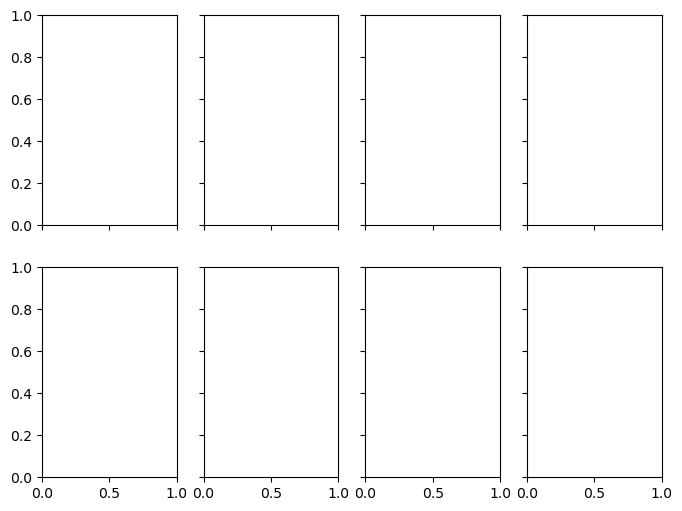

In [19]:
fig, ax = plt.subplots(2,4, sharex=True, sharey=True, figsize=(8,6))
fs=7

Plot_Noise(models_noise_GS_A2_1, model_A2_1[pos], model_GS_A2_1[pos], ax=ax[0,0], ylab=True)
ax[0,0].set_title('Case A2-1 - Global search', fontsize=fs)
Plot_Noise(models_noise_GS_A2_2, model_A2_2[pos], model_GS_A2_2[pos], ax=ax[0,1])
ax[0,1].set_title('Case A2-2- Global search', fontsize=fs)
Plot_Noise(models_noise_GS_A2_3, model_A2_3[pos], model_GS_A2_3[pos], ax=ax[0,2])
ax[0,2].set_title('Case A2-3 - Global search', fontsize=fs)
Plot_Noise(models_noise_GS_A2_4, model_A2_4[pos], model_GS_A2_4[pos], ax=ax[0,3])
ax[0,3].set_title('Case A2-4 - Global search', fontsize=fs)

Plot_Noise(models_noise_Opt_A2_1, model_A2_1[pos], model_Opt_A2_1[pos], ax=ax[1,0], ylab=True, xlab=True)
ax[1,0].set_title('Case A2-1 - Optimization', fontsize=fs)
Plot_Noise(models_noise_Opt_A2_2, model_A2_2[pos], model_Opt_A2_2[pos], ax=ax[1,1], xlab=True)
ax[1,1].set_title('Case A2-2 - Optimization', fontsize=fs)
Plot_Noise(models_noise_Opt_A2_3, model_A2_3[pos], model_Opt_A2_3[pos], ax=ax[1,2], xlab=True)
ax[1,2].set_title('Case A2-3 - Optimization', fontsize=fs)
Plot_Noise(models_noise_Opt_A2_4, model_A2_4[pos], model_Opt_A2_4[pos], ax=ax[1,3], xlab=True)
ax[1,3].set_title('Case A2-4 - Optimization', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures/NoiseAnalysis_CaseA2.eps', format='eps')

In [42]:
def nrmse(obs, pred):
    
    nrse = root_mean_squared_error(obs, pred)/np.abs(np.max(obs)-np.min(obs))
    return nrse

In [86]:

def Error_analysis_sigma1(model_est, data_true, pos, thicks, conds):
    """ change later rmse"""
    err = []
    models_err = []
    for h1 in thicks:
        for sigma2 in conds:
            mod = [h1, model_est[pos,1], sigma2]
            sigma1 = model_est[pos,1]
            dat = EMf_2Lay_HVP_Q(lambd, sigma1, sigma2, h1, height, offsets, freq, filt)
            nrse = nrmse(data_true[pos,:9], dat)
            
            #if nrse < 0.5:
            err.append(nrse)    
            models_err.append(mod)

    err = np.array(err)
    models_err = np.array(models_err)

    return err, models_err
        

In [87]:
err_GS_A2_1, models_err_GS_A2_1 = Error_analysis_sigma1(model_GS_A2_1, data_A2_1, pos, thicks, conds)
err_GS_A2_2, models_err_GS_A2_2 = Error_analysis_sigma1(model_GS_A2_2, data_A2_2, pos, thicks, conds)
err_GS_A2_3, models_err_GS_A2_3 = Error_analysis_sigma1(model_GS_A2_3, data_A2_3, pos, thicks, conds)
err_GS_A2_4, models_err_GS_A2_4 = Error_analysis_sigma1(model_GS_A2_4, data_A2_4, pos, thicks, conds)

err_Opt_A2_1, models_err_Opt_A2_1 = Error_analysis_sigma1(model_Opt_A2_1, data_A2_1, pos, thicks, conds)
err_Opt_A2_2, models_err_Opt_A2_2 = Error_analysis_sigma1(model_Opt_A2_2, data_A2_2, pos, thicks, conds)
err_Opt_A2_3, models_err_Opt_A2_3 = Error_analysis_sigma1(model_Opt_A2_3, data_A2_3, pos, thicks, conds)
err_Opt_A2_4, models_err_Opt_A2_4 = Error_analysis_sigma1(model_Opt_A2_4, data_A2_4, pos, thicks, conds)

In [88]:
# Function to plot Error space

def PlotErrorSpace(ax1, ax2, model, model_est, err, models_err, xmin, xmax, ymin, ymax, case='', method='', depthmax=-8, colorbar=False):
    # Arrays to plot
    depth_true = np.array([0, -model[0], depthmax])
    depth_est = np.array([0, -model_est[0], depthmax])

    sigma_true = np.hstack([model[1:], model[-1]])
    sigma_est = np.hstack([model_est[1:], model_est[-1]])
       
  #  fig, ax = plt.subplots(1,2, figsize=(6,4), gridspec_kw={'width_ratios': [1,1.5]})
    
    ax1.step(sigma_true*1000, depth_true, 'r', label = 'True')
    ax1.step(sigma_est*1000, depth_est, 'g', label='Estimated')
    ax1.set_xlim([10,2000])
    ax1.set_ylabel('Depth [m]', fontsize=8)
    ax1.set_xlabel('$\sigma$ [mS/m]', fontsize=8)
    ax1.set_title('1D Model position: ' +str(pos) + ' - Case: '+case, fontsize=8)
    ax1.set_xscale('log')
    ax1.legend(fontsize=7)

    x = ((models_err[:,2])*1000) # conductivities of first layer in mS/m
    y = models_err[:,0]          # thickness of first layer
    z = err

    ngridx = 100
    ngridy = 200
    
    # Create grid values first.
    xi = np.linspace(np.min(x), np.max(x), ngridx)
    yi = np.linspace(np.min(y), np.max(y), ngridy)

    # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)

    ax2.contour(xi, yi, zi*100, levels=15, linewidths=0.5, colors='k', )
    cntr1 = ax2.contourf(xi, yi, zi*100, levels=15, cmap="RdBu_r", )#vmin=0, vmax=50)
    #ax2.plot(x, y, '.k', ms=1)
    ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax2.scatter(model[2]*1000, model[0], marker='o', c='k', label='True model', s=10)
    ax2.scatter(((model_est[2])*1000), model_est[0], marker ='x', c='y', label='Estimated model', )
    
    ax2.set_xlabel('$\sigma_2$ [mS/m]', fontsize=8)
    ax2.set_ylabel('$h_1$ [m]', fontsize=8)
    ax2.legend(fontsize=7)
    ax2.tick_params(axis='both',labelsize=9)
    ax1.tick_params(axis='both',labelsize=9)
    ax2.set_title(method, fontsize=8)
    ax1.set_xscale('log')
    
    if colorbar==True:
        clb = fig.colorbar(cntr1, ax=ax2,)# ticks=[0,10,20,30,40,50])
        clb.ax.set_title('NRMSE %', fontsize=7)
        clb.ax.tick_params(labelsize=9)

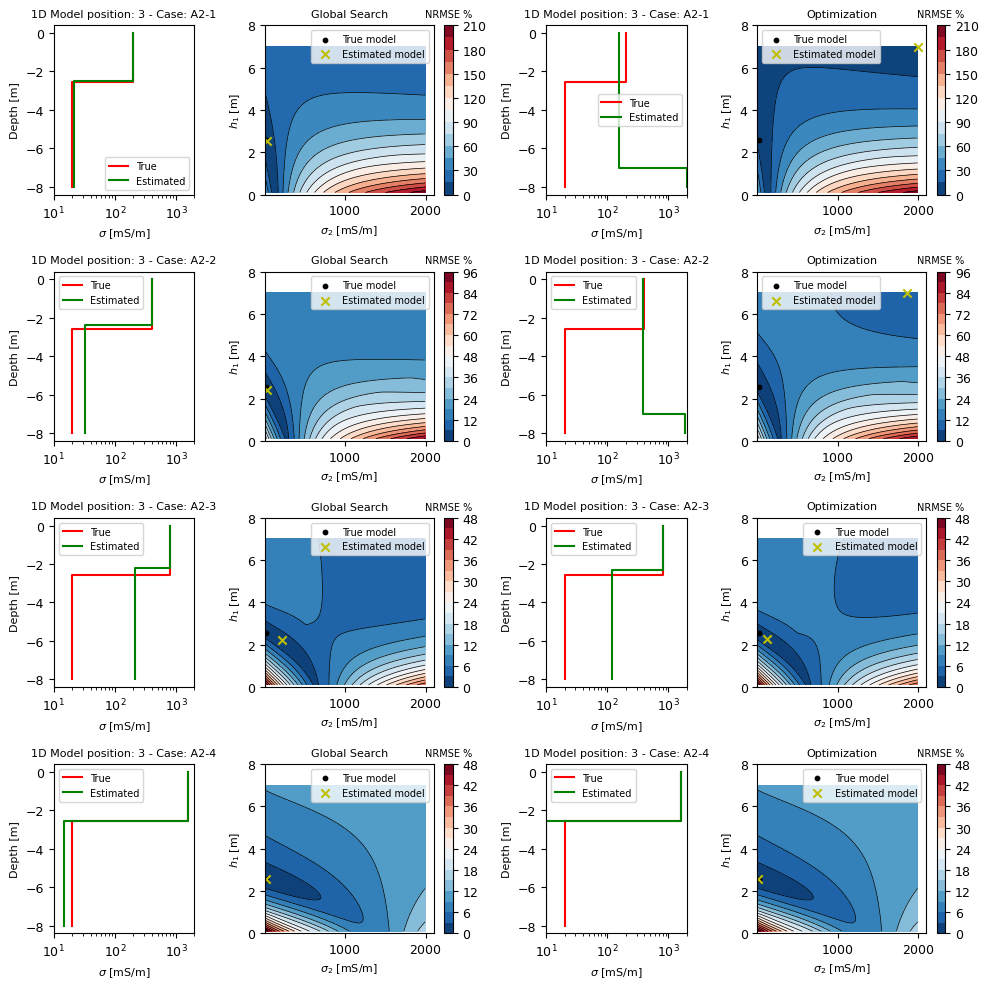

In [89]:
fig, ax = plt.subplots(4,4, figsize=(10,10), gridspec_kw={'width_ratios': [1, 1.5, 1, 1.5]})

PlotErrorSpace(ax[0,0], ax[0,1], model_A2_1[pos], model_GS_A2_1[pos], err_GS_A2_1, models_err_GS_A2_1, 1, 2100, 0, 8, 
               case='A2-1', method='Global Search', colorbar=True)
PlotErrorSpace(ax[1,0], ax[1,1], model_A2_2[pos], model_GS_A2_2[pos], err_GS_A2_2, models_err_GS_A2_2, 1, 2100,  0, 8,
              case='A2-2', method='Global Search', colorbar=True)
PlotErrorSpace(ax[2,0], ax[2,1], model_A2_3[pos], model_GS_A2_3[pos], err_GS_A2_3, models_err_GS_A2_3, 1, 2100,  0, 8,
              case='A2-3', method='Global Search', colorbar=True)
PlotErrorSpace(ax[3,0], ax[3,1], model_A2_4[pos], model_GS_A2_4[pos], err_GS_A2_4, models_err_GS_A2_4, 1, 2100,  0, 8,
              case='A2-4', method='Global Search', colorbar=True)

PlotErrorSpace(ax[0,2], ax[0,3], model_A2_1[pos], model_Opt_A2_1[pos], err_Opt_A2_1, models_err_Opt_A2_1, 1, 2100, 0, 8,
              case='A2-1', method='Optimization', colorbar=True)
PlotErrorSpace(ax[1,2], ax[1,3], model_A2_2[pos], model_Opt_A2_2[pos], err_Opt_A2_2, models_err_Opt_A2_2, 1, 2100,  0, 8,
              case='A2-2', method='Optimization', colorbar=True)
PlotErrorSpace(ax[2,2], ax[2,3], model_A2_3[pos], model_Opt_A2_3[pos], err_Opt_A2_3, models_err_Opt_A2_3, 1, 2100,  0, 8,
              case='A2-3', method='Optimization', colorbar=True)
PlotErrorSpace(ax[3,2], ax[3,3], model_A2_4[pos], model_Opt_A2_4[pos], err_Opt_A2_4, models_err_Opt_A2_4, 1, 2100,  0, 8,
              case='A2-4', method='Optimization', colorbar=True)

plt.tight_layout()
#plt.show()
#plt.savefig('figures/ErrorSpace_caseA2.eps', format='eps')